<a href="https://colab.research.google.com/github/andrew-veriga/MathForML/blob/master/ConvolutionalCoffieCircles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load libs

In [2]:
import tensorflow as tf
import numpy as np

### Load picture

In [0]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# img_import = drive.CreateFile({'id':'1Nho1Ed_TnlSzTkJ0v0pc9dfvQH-HOws9'})
# img_import.GetContentFile('sample.png') 

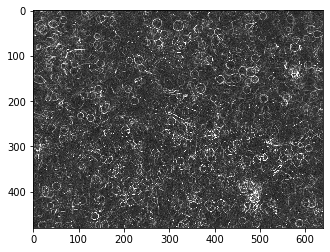

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path='https://github.com/andrew-veriga/MathForML/blob/master/CoffieCircles.png?raw=true'
#img_path='https://drive.google.com/file/d/1Nho1Ed_TnlSzTkJ0v0pc9dfvQH-HOws9/view?usp=sharing'
#img_path='https://www.dropbox.com/s/8naq7w6w2egpl6t/CoffieCircles.png?dl=0'
Image = mpimg.imread(img_path)
plt.imshow(Image)

In [5]:
print(Image.shape)

(480, 640, 4)


###Prepare picture
Convert Image to 2D

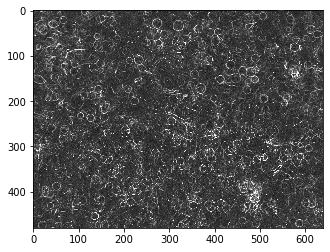

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Image = rgb2gray(Image)    
plt.imshow(Image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [7]:
print (Image.shape)

(480, 640)


###Init variables

`MaxSize` - max size of square region

`MinSize` - min size of square region

`Contrast` - scalar set contrast of recognizing ring 
`Thick` - thickness of ring
`FoundCircles` - numpy array of centers and radiuces (3,None)

In [0]:
firstX=1
firstY=1
ImageSize = (48,64) #Image.shape
MaxSize = 40 
MinSize = 10
Contrast = .18
Variance = 0.03
Thick = .8
FoundCircles = np.array([0,3])
_DEBUG_=False

In [0]:
# from scipy.spatial import distance
# for i in range(0,a.shape[0]):
#   d = [np.sum((a[i]-a[j])**2) for j in range(i+1,a.shape[0])] 
#   print(d) 

###function isCircleFound
calculate average brightness over all pixels of current square;
If pixels of SelectedRing have avg brightness more then avg brightness over all square - circle is found 


In [0]:
#from scipy.special import softmax

def isCircleFound(_box, _mask):
  
  brightness = (lambda arr: np.average(arr-np.min(_box)))#/(np.max(arr)-np.min(box))))
  if _DEBUG_:
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
  if ((brightness(_box[_mask]) - brightness(_box[~_mask])) > Contrast and np.var(_box[_mask]) < Variance):
    print (brightness(_box[_mask]))
    print (brightness(_box[~_mask]))
    print(np.var(_box[_mask]))
    return True
  else:
    return False
  

### function FuzzyCircleConv

In [0]:
import numpy.ma as ma

def FuzzyCircleConv(_box, _mask):
  # return sum(np.dot(_box,_mask))
  mlt = np.multiply(_box,_mask)
  return np.sum(mlt)#/ np.var(ma.masked_values(mlt, 0.0 ))
  

###function getMask
create square matrix of boolean as a ring of Trues inscribed in a square of Falses 

False


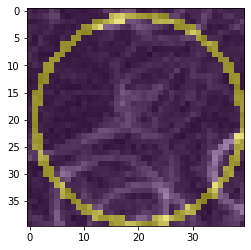

In [12]:
import itertools

def getMask( size, thick = 1 ):
    radius = size //2 - 1
    center = np.array([size/2,size/2])
    vectors = [[(i,j) for j in range(size)] for i in range(size)]
    l = itertools.chain.from_iterable(zip(*vectors))
    
    # list of pairs (x,y) belong of ring
    selectedVecs = np.array(list(filter(lambda v: np.abs(np.linalg.norm(v - center) - radius) < thick,l)))
    
    #ring mask
    ring = np.array(np.zeros((size,size),dtype=np.bool))
    for (i,j) in (selectedVecs):
      ring[i,j]=True
    
    return ring

Mask = getMask( MaxSize, .8 )
square = Image[firstY:firstY+MaxSize, firstX:firstX+MaxSize]
    
#ring visualisation
fig, ax = plt.subplots()
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
ax.imshow(getMask( MaxSize, .8 ),alpha=.5)
fig.show()
print (isCircleFound(square, Mask))

###function getFuzzyMask

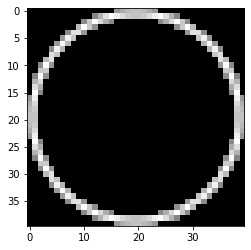

In [29]:
import itertools
import numpy as np
import random as rn
    # size=40 
    # thick = 1
MaxPix = np.max(Image)
MinPix = np.min(Image)

def getFuzzyMask( size, thick = 1. ):
    radius = size //2-1
    center = np.array([size/2-.5,size/2-.5])
    vectors = [[(i,j, thick - np.abs(np.linalg.norm((i,j) - center) - radius)) for j in range(size)] for i in range(size)]
    l = itertools.chain.from_iterable(zip(*vectors))
    
    # list of pairs (x,y) belong of ring
    selectedVecs = np.array(list(filter(lambda v: v[2] > 0. ,l)))
    #ring mask
    ring = np.ones((size,size), dtype=np.float32) #np.random.rand(size,size)
    # print(selectedVecs.T[2])
    # print(np.max(selectedVecs.T[2]))
    maxMask= np.max(selectedVecs.T[2])
    ring = -(ring - MinPix)/(MaxPix-MinPix)
    
    for (i,j,k) in (selectedVecs):
      ring[np.int(i),np.int(j)]=k/maxMask

    return ring
plt.imshow(getFuzzyMask(40,1),cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)


###One example of arbitrary ring

Conv value: -0.23938815451312112


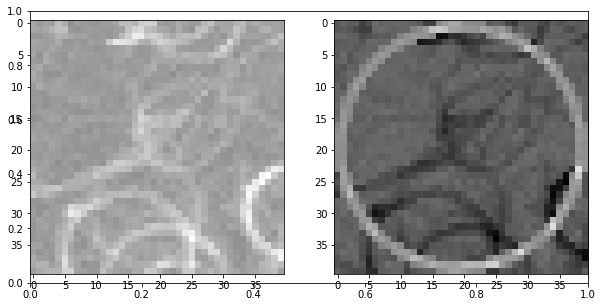

In [30]:
Mask = getFuzzyMask( MaxSize, 1 )
square = Image[firstY:firstY+MaxSize, firstX:firstX+MaxSize]
    
#ring visualisation
#ring visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)

ax1=fig.add_subplot(1,2,2)

ax1.imshow(np.multiply(square,Mask), cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
fig.show()
print('Conv value:',FuzzyCircleConv(square,Mask)/MaxSize**2)


###One example of founded ring

conv value -0.08034258328586487


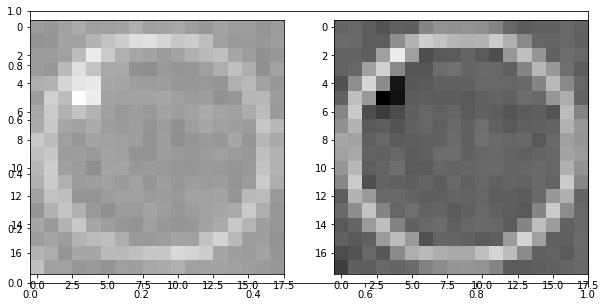

In [31]:
#SquareSize=20, (x,y)= 57, 13

x=58
y=13
size=18
Mask = getFuzzyMask( size, 1 )
square = Image[y:y+size, x:x+size]
    
#ring visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)

ax1=fig.add_subplot(1,2,2)
#ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#ax1.imshow(Mask,alpha=.5)
ax1.imshow(np.multiply(square,Mask), cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
fig.show()
print('conv value', FuzzyCircleConv(square,Mask)/size**2)
#print(FuzzyCircleConv(square,Mask))
# _DEBUG_=True
# print(isCircleFound(square, Mask))
# print(np.var(square[Mask]))
# _DEBUG_=False

### Main loops


In [0]:
ConvMatrices = np.zeros((ImageSize[0]+MaxSize+1, ImageSize[1]+MaxSize+1, MaxSize - MinSize ))


In [0]:
    size = MinSize
# for size in range(MinSize,MaxSize+1):
    mask = getFuzzyMask( size, Thick )
    print('size '+str(size))
    y=0
    x=0
# for y in range(0,ImageSize[0]-size):
    for x in range(0, ImageSize[1] - size):
      square = Image[y:y+size, x:x+size]
      ConvMatrices[y,x, size - MinSize] = FuzzyCircleConv(square,mask)
      # fig, ax = plt.subplots()
      # ax = fig.add_subplot(1,2,1)
      # ax.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
      # ax1=fig.add_subplot(1,2,2)
      # ax1.imshow(square, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
      # ax1.imshow(mask,alpha=.5)
      # fig.show()
      # print([(x,y),size])
      

    

size 10


In [0]:
ConvMatrices[0,...,0]

array([ 863.8796123 ,  997.05494413, 1566.02436735, 1430.70842784,
        769.44662115,  538.91174671,  596.89063151,  665.20872   ,
        749.93941954,  693.32894021,  562.60534731,  664.00998906,
        582.47387617,  426.01595197,  381.80930266,  434.19445283,
        578.3662442 , 1336.97343545, 1388.79169595,  946.01249591,
        710.77914139,  656.94886881,  448.44541672,  486.42137827,
        885.41787367, 1255.30930404, 1631.83789916, 1063.42557167,
        864.13310708,  755.96101279,  604.63997314,  707.76258896,
       1641.3994573 , 2233.47036258, 1887.26477989, 1448.62381121,
       1845.10474109, 1830.27615241, 1018.91405523,  888.42147113,
        855.00124651,  988.38500333, 1178.94143228, 1320.73981789,
       1935.78970898, 1370.10604247,  658.91430932,  586.05284378,
        872.14548792, 1274.40812891,  516.50913745,  515.46781402,
       1461.8451658 ,  951.00157757,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [0]:
from tempfile import TemporaryFile

# outfile = TemporaryFile()
np.save('foundCircles', FoundCircles)

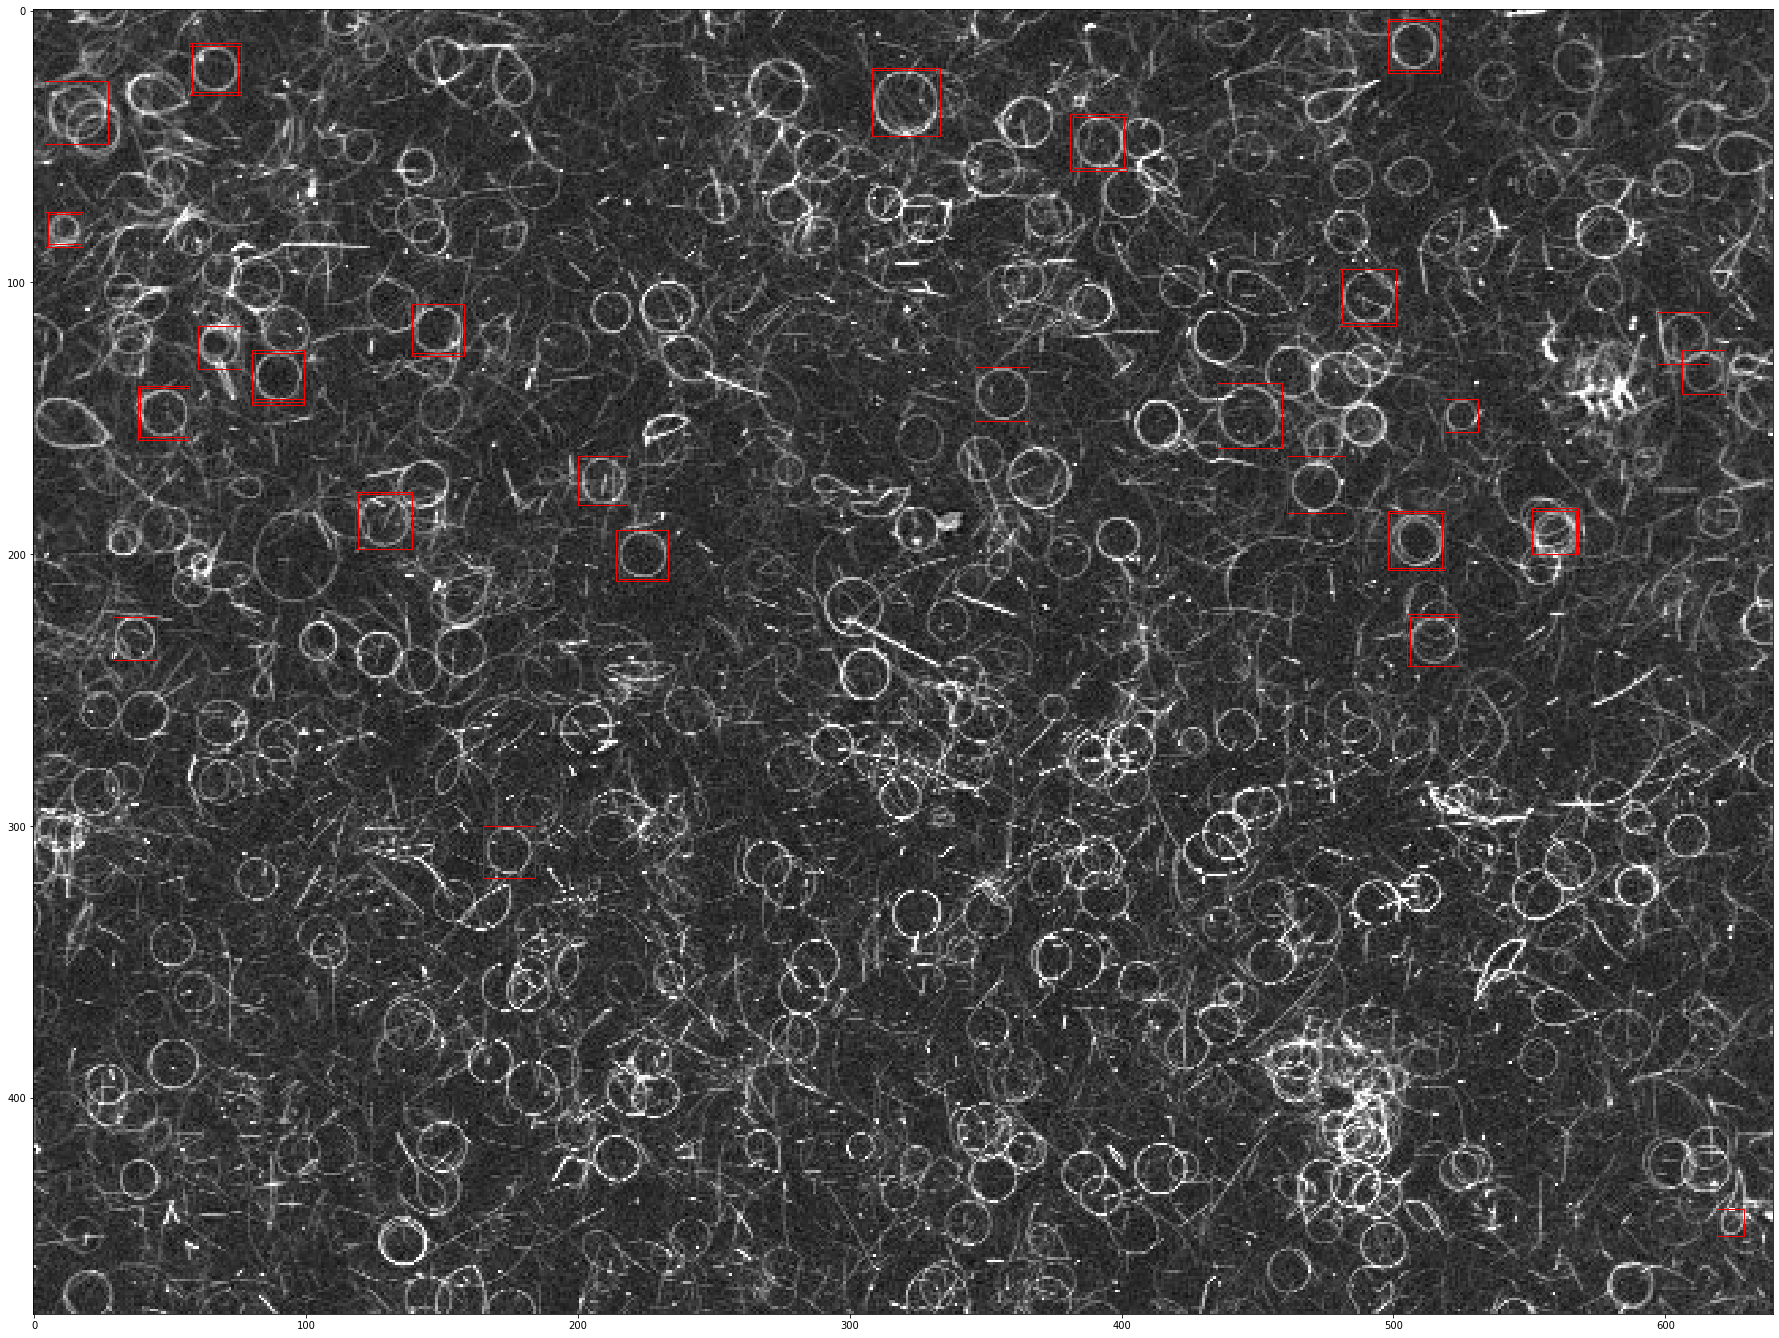

In [0]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(32, 24))
ax.imshow(Image,cmap=plt.get_cmap('gray') )
# Create a Rectangle patch
for r in ConvMatrices[0,...,0]:
  rect = patches.Rectangle((r[0],r[1]),r[2],r[2],linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)


In [0]:
#[(30, 101), 40]
y=101
x=30
size = 40
square = Image[y:y+size, x:x+size]
mask = getMask( size, Thick )
arr = square[mask]
box = square
st = (lambda arr: np.mean((arr-np.min(arr))))
print (st(box[mask]))
print (st(box[~mask]))
print(np.var(box[mask]))


0.28207442110222863
0.1983998725808608
0.05047860578110671
0.05047860578110671
